# Extension

## 1) Data preparation

###  A) Load datasets

First we will load all the dataset we need. We load the 2015 ward Tesco 1.0 dataset and the official London ward 2015 dataset.

In [1]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
root = "data/"
tesco_ward_path = os.path.join(root,"year_osward_grocery.csv")
ward_profile_path = os.path.join(root,"ward-profiles-excel-version.csv")

In [3]:
tesco_ward_df = pd.read_csv(tesco_ward_path)
ward_profile_df = pd.read_csv(ward_profile_path,encoding = "ISO-8859-1")

In [4]:
tesco_ward_df.head(5)

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E05000026,449.535137,32.5,166.4,300.0,500.0,1500.0,771.349423,3.716832,125.960833,...,37315,14370.0,7469.0,6901.0,4211.0,9421.0,738.0,29.572999,1.26,11404.761905
1,E05000027,413.130263,32.5,150.0,300.0,500.0,1500.0,626.395178,5.164174,110.664114,...,14474,10845.0,5228.0,5617.0,3205.0,6608.0,1032.0,33.568004,1.36,7974.264706
2,E05000028,407.100472,32.5,160.0,300.0,500.0,1200.0,545.890959,2.710677,121.990710,...,32138,13856.0,6750.0,7106.0,4180.0,8537.0,1139.0,32.032693,1.29,10741.085271
3,E05000029,384.173858,30.0,150.0,250.0,454.0,1500.0,591.837557,4.968373,122.245578,...,16223,10850.0,5300.0,5550.0,3023.0,6251.0,1576.0,36.004793,3.38,3210.059172
4,E05000030,356.882607,30.0,140.0,250.0,450.0,1000.0,465.284180,3.880963,109.959688,...,17522,11348.0,5515.0,5833.0,2747.0,6961.0,1640.0,37.247444,3.45,3289.275362


In [5]:
tesco_ward_df.shape

(638, 202)

In paper dataset, we have 201 nutrition related features and 638 wards.

In [7]:
ward_profile_df.head(2)

,Ward name,Old code,New code,Population - 2015,Children aged 0-15 - 2015,Working-age (16-64) - 2015,Older people aged 65+ - 2015,% All Children aged 0-15 - 2015,% All Working-age (16-64) - 2015,% All Older people aged 65+ - 2015,...,A-Level Average Point Score Per Student - 2013/14,A-Level Average Point Score Per Entry; 2013/14,Crime rate - 2014/15,Violence against the person rate - 2014/15,"Deliberate Fires per 1,000 population - 2014",% area that is open space - 2014,Cars per household - 2011,Average Public Transport Accessibility score - 2014,% travel by bicycle to work - 2011,Turnout at Mayoral election - 2012
0,City of London,00AA,E09000001,8100.0,650.0,6250.0,1250.0,8.0,76.9,15.2,...,662.9,210.5,656.4,85.3,0.4,18.6,0.4,7.9,5.3,48.5
1,Barking and Dagenham - Abbey,00ABFX,E05000026,14750.0,3850.0,10150.0,750.0,26.0,69.0,5.0,...,682.6,208.9,138.1,42.2,1.4,21.9,0.5,6.0,0.8,25.7


In [8]:
ward_profile_df.shape

(660, 67)

In official ward dataset, we have 66 different features about official statistics of each ward. We observe there are 660 wards.

Now we will load geographic data of wards for geovisualization.

In [9]:
ward_map_path = os.path.join(root,"London-wards-2014","London-wards-2014_ESRI","London_Ward.shp")
ward_map_df = gpd.read_file(ward_map_path)
ward_map_df.head(5)

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16..."
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16..."
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16..."
4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,"POLYGON ((522071.000 168144.900, 522063.900 16..."


In [10]:
ward_map_df.shape

(654, 8)

This dataset presents the localization of 654 wards.

### B) Prepare datasets

In [14]:
official_useful_features = ["New code", "Median Household income estimate (2012/13)"]
main_df = tesco_ward_df.merge(ward_profile_df[official_useful_features],
                              left_on="area_id",right_on="New code")
main_df.head(5)

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km,New code,Median Household income estimate (2012/13)
0,E05000026,449.535137,32.5,166.4,300.0,500.0,1500.0,771.349423,3.716832,125.960833,...,7469.0,6901.0,4211.0,9421.0,738.0,29.572999,1.26,11404.761905,E05000026,33920.0
1,E05000027,413.130263,32.5,150.0,300.0,500.0,1500.0,626.395178,5.164174,110.664114,...,5228.0,5617.0,3205.0,6608.0,1032.0,33.568004,1.36,7974.264706,E05000027,32470.0
2,E05000028,407.100472,32.5,160.0,300.0,500.0,1200.0,545.890959,2.710677,121.990710,...,6750.0,7106.0,4180.0,8537.0,1139.0,32.032693,1.29,10741.085271,E05000028,33000.0
3,E05000029,384.173858,30.0,150.0,250.0,454.0,1500.0,591.837557,4.968373,122.245578,...,5300.0,5550.0,3023.0,6251.0,1576.0,36.004793,3.38,3210.059172,E05000029,33920.0
4,E05000030,356.882607,30.0,140.0,250.0,450.0,1000.0,465.284180,3.880963,109.959688,...,5515.0,5833.0,2747.0,6961.0,1640.0,37.247444,3.45,3289.275362,E05000030,37400.0


In [18]:
main_df.shape

(483, 204)

## 2) Visualization

In [11]:
ward_map_path = os.path.join(root,"London-wards-2014","London-wards-2014_ESRI","London_Ward.shp")

In [17]:
ward_map_df = gpd.read_file(ward_map_path)
ward_map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry
0,Chessington South,E05000405,755.173,0.0,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Tolworth and Hook Rise,E05000414,259.464,0.0,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16..."
2,Berrylands,E05000401,145.390,0.0,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16..."
3,Alexandra,E05000400,268.506,0.0,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16..."
4,Beverley,E05000402,187.821,0.0,E09000021,Kingston upon Thames,117161,"POLYGON ((522071.000 168144.900, 522063.900 16..."


<AxesSubplot:>

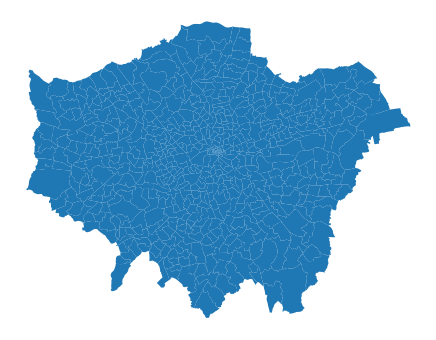

In [16]:
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis("off")
ward_map_df.plot(ax=ax)